In [1]:
%matplotlib inline

In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
data_dir = './data/'

In [4]:
import flatten as fat

In [5]:
DATA_DIR = './data/'

In [6]:
climb = fat.combine_pickle(DATA_DIR)
print climb.loc['/v/religious-retreat/109207355']

aid                                                             NaN
alpine                                                          NaN
area_hierarchy    [/destinations/, /v/alaska/105909311, /v/ancho...
boulder                                                         NaN
children                                                        NaN
children_href                                                  None
chipped                                                         NaN
commitment                                                      NaN
description       Religious Retreat is the far right route on th...
elevation                                                       NaN
fa                                        Paul Turecki, J.J. Brooks
feet                                                            NaN
getting_there                                                   NaN
href                                 /v/religious-retreat/109207355
ice                                             

In [7]:
climb.shape

(12644, 43)

In [8]:
# isolate grade columns
import re
rate = [col for col in climb.columns if re.search(r'^rate', col)]
grade = climb[rate]
grade.shape

(12644, 8)

In [17]:
grade = grade.dropna(axis=0, how='all')
grade.sort_values(['rateZA'])

,rateBritish,rateEwbanks,rateFont,rateFrench,rateHueco,rateUIAA,rateYDS,rateZA
/v/psychology-wall/107942070,MS 4a,13,4,4b,V0,IV+,5.5,11
/v/sht-sandwich-with-a-side-of-choss-/110737261,S 4b,14,4,4c,V0,V,5.6,12
/v/first-beginning/106940778,MVS 4b,15,4,5a,V0,V+,5.7,13
/v/an-endless-journey/106728483,MVS 4b,15,4-,5a,V0-,V+,5.7,13
/v/just-enough/106827911,VS 4c,16,5,5b,V1+,VI-,5.8-,14
/v/euclid-and-2nd-st-crack/109745173,HVS 4c,16,4,5b,V0,VI-,5.8,15
/v/minnow/106627280,HVS 4c,16,4,5b,V0,VI-,5.8,15
/v/jail-house-rock/108014907,HVS 4c,16,4+,5b,V0+,VI-,5.8+,15
/v/cosmic-ray/106387468,HVS 5a,17,4-,5c,V0-,VI,5.9,17
/v/run-for-the-hills/106208950,HVS 5a,17,5+,5c,V2,VI,5.9,17


In [10]:
#grade.sort_values(['rateEwbanks'])
grade['rateEwbanks'].unique()
grade['rateZA'].unique()

array(['13', '14', '12', '25', '24', '23', '28', '17', '15', '7', '18',
       '11', '27'], dtype=object)

In [11]:
grade.rateHueco.unique()

array(['V0', 'V1+', 'V6', 'V5', 'V7', 'V3', 'V0-', 'V0+', 'V2', 'V9+',
       'V4-', 'V-easy'], dtype=object)

In [12]:
import numpy as np
def convert_hueco(hueco, LEAST_DIFFICULT=float(0), FIRST_STEP=float(1)):

    if not pd.isnull(hueco):
        hueco = hueco[1:]

        if hueco == '-easy':
            # lower bound
            hard = LEAST_DIFFICULT
        else:
            # V0 will be equal to this
            hard = LEAST_DIFFICULT + FIRST_STEP

            # deal with the numbers in the string
            if re.search(r'(\+$)|(-$)', hueco):
                pnt = float(hueco[:-1].strip())
                # add/take a half a point off for plus minus
                if hueco[-1] == '+':
                    hard += pnt + .5
                else:
                    hard += pnt - .5
            elif re.search(r'(\d+)[- ]+(\d+)', hueco):
                # return the mean of a range
                lower = re.findall(r'\d+', hueco)[0].strip()
                upper = re.findall(r'\d+', hueco)[1].strip()
                hard += np.mean( [float(lower), float(upper)] )
            elif re.search(r'\d+', hueco):                    
                try:
                    # cast as float ignoring sign
                    core_rate = float(hueco.strip('+-'))
                except:
                    hard = None
                else:
                    hard += core_rate

        return hard

In [13]:
convert_hueco('V45+46')

In [14]:
climb['floatHueco'] = map(convert_hueco, climb['rateHueco'])

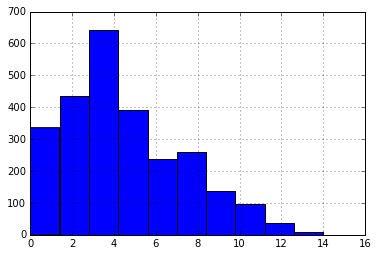

In [15]:
climb['floatHueco'].hist()

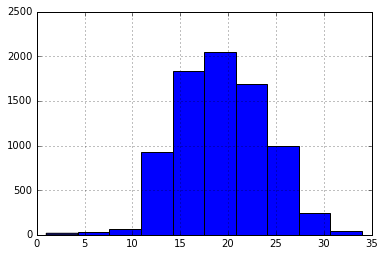

In [19]:
climb['floatZA'] = climb['rateZA'].astype(float)
climb['floatZA'].hist()